In [7]:
from sage_plotting import kaplan_meier_plot
from sage_survival_function import survival_analysis
import pandas as pd
import numpy as np

%matplotlib inline

# Load some data

In [8]:
df = pd.read_csv('/scratch/gh8sj/orien_data/data/processed_msigdb_survival_treatment.csv', index_col=0)

In [9]:
df

,A2M,AAAS,AAK1,AAMDC,ABAT,ABCA1,ABCB1,ABCC1,ABCC3,ABCC5,...,ZNF707,ZNFX1,ZNRF1,ZSWIM6,ZWINT,ZYX,ImmunoOncologyDrug,months,OverallSurvivalStatus,status
0051J3VD4F_FT-SA164568R_FT-SA164568D,1.66,-1.47,0.10,1.16,0.16,0.44,0.08,-0.27,0.74,-0.41,...,-0.05,-0.14,-0.66,0.65,0.20,1.26,No,8.09,0:LIVING,0
00A6A93BSE_SL375721_SL379539,1.03,-1.37,-0.44,-0.87,0.84,-0.37,0.57,-0.95,0.08,-1.32,...,-0.97,-0.80,-1.20,0.72,-1.14,0.52,No,69.30,0:LIVING,0
00FQA72XK2_FT-SA158516R_FT-SA158516D,0.53,-0.45,-1.28,-0.30,-0.32,-0.06,-0.29,-0.46,0.97,-0.85,...,0.27,-0.34,1.43,0.69,0.14,-0.26,No,37.27,0:LIVING,0
00QDV6PYKZ_FT-SA202503R_FT-SA202503D,1.70,0.22,-0.47,0.74,-0.71,-0.12,0.31,-0.52,0.80,-0.90,...,0.02,0.19,-0.21,0.70,-1.11,1.25,No,44.54,0:LIVING,0
00TPNTLY6Y_FT-SA172262R_FT-SA172262D,0.63,-0.73,-0.88,0.67,-0.29,-0.83,-0.79,-0.04,1.15,-0.04,...,0.74,-0.62,-0.13,0.23,-0.29,0.00,No,21.92,0:LIVING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTKXAEZUGU_SL376924,-0.04,0.00,0.62,-0.20,-0.30,0.76,-0.82,-0.08,-0.87,1.11,...,-0.95,-0.44,-0.23,-0.45,0.06,-0.33,No,13.06,1:DECEASED,1
ZVLZEUHOZY_SL542832_SL536295,-0.17,-0.39,0.28,-0.49,-0.75,0.81,-1.16,0.80,-0.34,0.21,...,0.68,0.08,0.95,-0.31,-0.11,1.66,Yes,31.18,0:LIVING,0
ZWP58O13XK_SL563333_SL526853,-0.72,-0.60,-2.63,1.30,-0.65,0.16,-1.48,-0.32,0.80,-1.00,...,-0.50,0.38,0.57,0.70,1.06,0.89,No,18.24,0:LIVING,0
ZXUDE5LCZ5_SL376880_SL369602,1.64,0.43,0.04,-0.81,0.22,-1.24,0.29,-0.32,0.58,-0.60,...,-0.96,0.24,-0.73,-0.28,-1.50,0.82,No,79.86,0:LIVING,0


In [10]:
gene_expression_df = df.iloc[:,:-4]
survival_treatment_df = df.iloc[:,-4:]

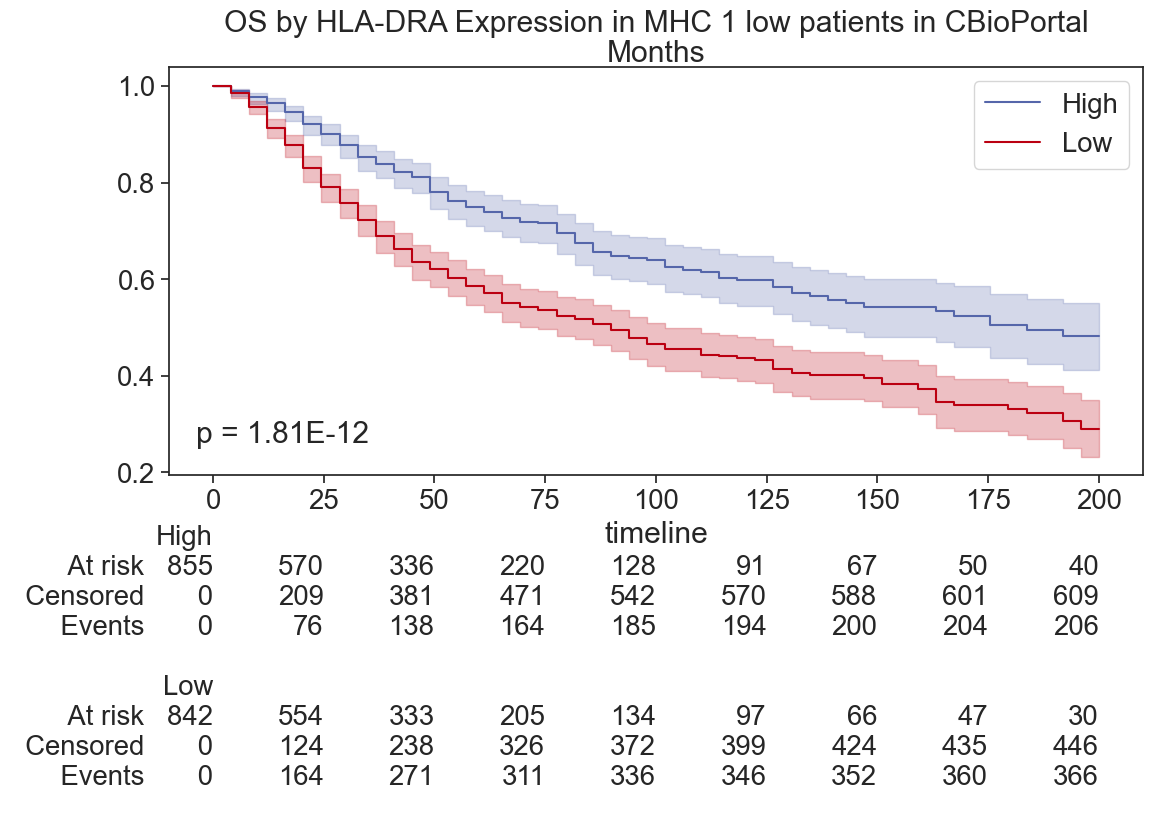

In [11]:
kaplan_meier_plot(
    orien_data=gene_expression_df, 
    survival=survival_treatment_df,
    time_col='months',
    gene='HLA-DRA',
    title='OS by HLA-DRA Expression in MHC 1 low patients in CBioPortal'
)
